matplotlib.rcParams['figure.figsize'] = (1, 1)
matplotlib.rcParams['xtick.major.size'] = 1.5
matplotlib.rcParams['ytick.major.size'] = 1.5
font = {'family' : 'Arial',
        'size'   : 17}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 10.5
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)

In [1]:
pwd

u'/home/riddhisw/Documents/2017/Scripts_Git'

In [2]:
ver=0
path = './PaperFigsData/'
ALGOLIST = ['LKFFB', 'AKF'] # loss maps
my_dpi = 400

In [3]:
import sys 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import svgutils.transform as sg

from plotting_tools.plot_helper_funcs import plot_normed_means as pnm
from plotting_tools.plot_helper_funcs import plot_single_predictions as psp
from plotting_tools.load_raw_cluster_data import LoadExperiment as le
from plotting_tools.risk_analysis import build_risk_dict
from plotting_tools.plot_helper_funcs import plot_risk_map, plot_risk_trajectories

from plotting_tools.plot_figstyle_sheet import ALGOKEYS, fsize, PRED_H, PRED_L, RISK_H, RISK_L
from plotting_tools.plot_figstyle_sheet import PRED_H_ILL, PRED_L_ILL, RISK_H_ILL, RISK_L_ILL 

### LEGEND IMAGES

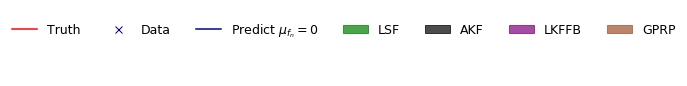

In [4]:
fig1 = plt.figure(figsize=(8,1.2))
ax = fig1.add_subplot(111)
lgd=ax.legend(handles=PRED_H,
       labels=PRED_L,
       bbox_to_anchor=(-0.12, 0, 0.0, 1), loc=2, ncol=9, frameon=True, fontsize=12.5, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(path+'fig_pred_lgd_lng_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi, bbox_extra_artists=(lgd,))
plt.show()

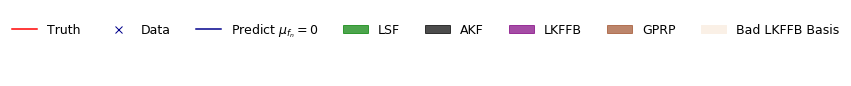

In [5]:
fig1 = plt.figure(figsize=(8,1.2))
ax = fig1.add_subplot(111)
lgd=ax.legend(handles=PRED_H_ILL,
       labels=PRED_L_ILL,
       bbox_to_anchor=(-0.12, 0, 0, 1), loc=2, ncol=9, frameon=True, fontsize=12.5, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(path+'fig_pred_lgd_lng_ill_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi, bbox_extra_artists=(lgd,))
plt.show()

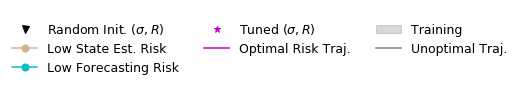

In [6]:
fig1 = plt.figure(figsize=(8,1.2))
ax = fig1.add_subplot(111)
lgd=ax.legend(handles=RISK_H,
       labels=RISK_L,
       bbox_to_anchor=(-0.12, 0, 0.0, 1), loc=2, ncol=3, frameon=True, fontsize=12.5, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(path+'fig_risk_lgd_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi, bbox_extra_artists=(lgd,))
plt.show()

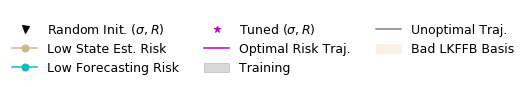

In [7]:
fig1 = plt.figure(figsize=(8,1.2))
ax = fig1.add_subplot(111)
lgd=ax.legend(handles=RISK_H_ILL,
       labels=RISK_L_ILL,
       bbox_to_anchor=(-0.15, 0, 0.0, 1), loc=2, ncol=3, frameon=True, fontsize=12.5, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(path+'fig_risk_lgd_ill_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi, bbox_extra_artists=(lgd,))
plt.show()

### FIG 1

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
GPRP: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 15, 12)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
GPRP: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 23, 11)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
GPRP: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 15, 12)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
GPRP: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 23, 11)


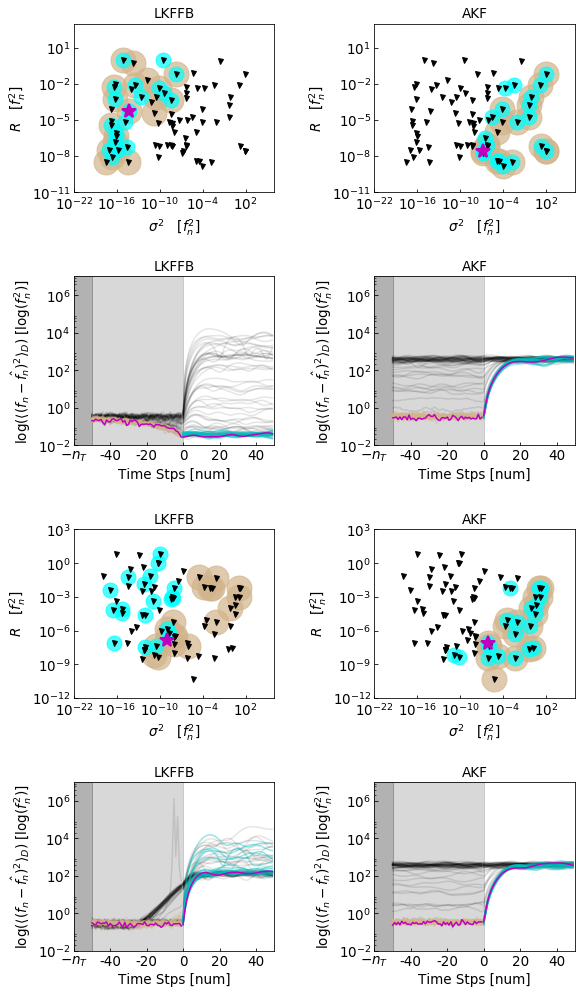

In [8]:
nrows = 4
ncols = 2
test_case_list = [15, 23]
variation_list = [12, 11]

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.12, right=0.99, 
                       top=0.99, bottom=0.07, 
                       wspace=0.5, hspace=0.5)
fig = plt.figure(figsize=(8,14))
for idx_cols in xrange(2):
    
    # Data 
    idx_case = 0
    testobj = le(test_case_list[idx_case], variation_list[idx_case], 
            AKF_path=path,
            LKFFB_path=path,
            LSF_path=path, 
            GPRP_path=path)
    RISKDICT = build_risk_dict(testobj)
    algotype = ALGOLIST[idx_cols]
        
    # Row 1 
    ax_ = fig.add_subplot(gs[0, idx_cols])
    ax_ = plot_risk_map(ax_, algotype, RISKDICT, fstep=50, sstep=50, lowloss=20, 
                  xlim=[-22, 6], ylim = [-11, 3])
    
    
    # Row 2
    ax_2 = fig.add_subplot(gs[1, idx_cols])
    ax_2 = plot_risk_trajectories(ax_2, algotype, RISKDICT, fstep=50, sstep=50, lowloss=20, ylim = [-2, 7])
    
            
    # Different Experiment for Row 3 and Row 4
    idx_case = 1
    testobj = le(test_case_list[idx_case], variation_list[idx_case], 
            AKF_path=path,
            LKFFB_path=path,
            LSF_path=path, 
            GPRP_path=path)
    RISKDICT = build_risk_dict(testobj)
    algotype = ALGOLIST[idx_cols]
    
    ax_3 = fig.add_subplot(gs[2, idx_cols])
    ax_3 = plot_risk_map(ax_3, algotype, RISKDICT, fstep=50, sstep=50, lowloss=20, 
                  xlim=[-22, 6], ylim = [-12, 3])
    
    # Row 4
    ax_4 = fig.add_subplot(gs[3, idx_cols])
    ax_4 = plot_risk_trajectories(ax_4, algotype, RISKDICT, fstep=50, sstep=50, lowloss=20, ylim = [-2, 7])

    for ax in [ax_, ax_2, ax_3, ax_4]:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)

plt.show()
fig.savefig(path+'fig_1_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi)#, bbox_extra_artists=(lgd,))

plt.close()

#create new SVG figure
fig = sg.SVGFigure("590px", "1100px")
subfig1 = sg.fromfile(path+'fig_risk_lgd_v_0.svg')
subfig2 = sg.fromfile(path+'fig_1_v_'+str(ver)+'.svg')

# get the plot objects
plot1 = subfig1.getroot()
plot2 = subfig2.getroot()

plot2.moveto(0, 108, scale=1.0) #no scaling, displace plot2 vertically

# add text labels
txt1 = sg.TextElement(30, 108, "A", size=18, font='Arial', weight="bold")
txt2 = sg.TextElement(30, 608, "B", size=18, font='Arial', weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2])
fig.append([txt1, txt2])

# assign filenames to SVG files
filename ="compiled_fig_1_ver_"+str(ver)
filenamesvg = './Notes_2017_v4/img/'+filename+".svg"
filenamepdf = './Notes_2017_v4/img/'+filename+'.pdf'

fig.save(filenamesvg)

!inkscape --file=$filenamesvg --export-area-drawing --export-pdf=$filenamepdf --export-latex

### FIG 2

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
GPRP: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 15, 12)
(15, 12)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
GPRP: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
('I am in RISK DICT and test case and variations are:', 15, 12)
('Total coeff', 22.317541925917173, 0.0089971871486011403)
LKFFB
('I am in RISK DICT and test case and variations are:', 15, 12)


plotting_tools/tuned_run_analysis.py:153: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (freq_basis_array == None) and (instantA == None):


GPRP
('First Few Ideal Instance:', [35], ' in bottom (top) 3 loss values (periodicity values)')
('Ideal Instances:', [0, 33, 3, 36, 38, 43, 44, 49, 35, 26], ' in bottom (top) 11 loss values (periodicity values)')
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
GPRP: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 23, 11)
(23, 11)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
GPRP: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
('I am in RISK DICT and test case and variations are:', 23, 11)
('Total coeff', 46.829555262793079, 0.018954806080715911)
LKFFB
('I am in RISK DICT and test case and variations are:', 23, 11)
GPRP
('First Few Ideal Instance:', [9], ' in bottom (top) 3 loss values (periodicity values)')
('Ideal Instances:', [32, 1, 4, 40, 9, 10, 43, 14, 15, 22], ' in bottom (top) 13 loss values (periodicity values)')


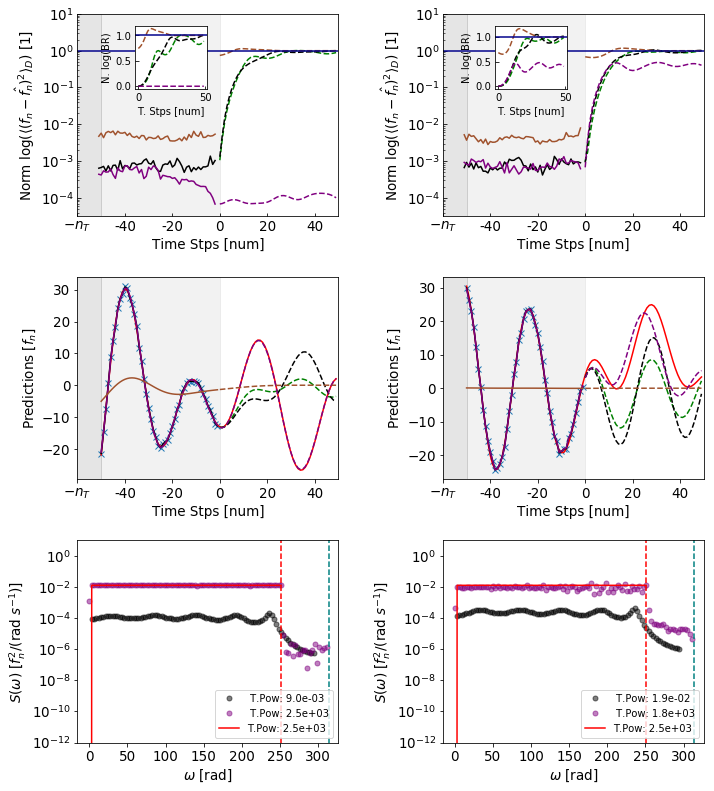

In [9]:
nrows = 3
ncols = 2
test_case_list = [15, 23]
variation_list = [12, 11]
translate_inset = [0.2, 0.7]

# Fig Template
gs = gridspec.GridSpec(nrows, ncols,
                       left=0.12, right=0.99, 
                       top=0.99, bottom=0.07, 
                       wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=(10,11))

# Plot for cases
for idx_cases in xrange(len(test_case_list)):
    
    # Data
    rect = [translate_inset[idx_cases], 0.895, 0.1, 0.08]

    ax_0 = fig.add_subplot(gs[0,idx_cases])
    ax_1 = fig.add_subplot(gs[1,idx_cases])
    ax_2 = fig.add_subplot(gs[2,idx_cases])
    in_0 = plt.axes(rect, facecolor='w')
                          
    ax_0, in_0 = pnm(ax_0, in_0, ALGOKEYS[0:4], 
                     test_case_list[idx_cases], variation_list[idx_cases], path,
                     fstep=50, sstep=50, lowloss=20, 
                     ylim = [-4.5, 1], yscale='log')

    ax_1, ax_2 = psp(ax_1, ax_2, ALGOKEYS[0:4], 
                     test_case_list[idx_cases], variation_list[idx_cases], path,
                     fstep=50, sstep=50, lowloss=20, 
                     ylim_amps = [-12, 1], yscale='linear')

    for ax in [ax_0, ax_2, ax_1]:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)

fig.savefig(path+'fig_2_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi)
plt.show()

In [10]:
#create new SVG figure
#fig_2_v_0
fig2 = sg.SVGFigure("750px", "1100px")
subfig1 = sg.fromfile(path+'fig_pred_lgd_v_0.svg')
subfig2 = sg.fromfile(path+'fig_2_v_'+str(ver)+'.svg')

# get the plot objects
plot1 = subfig1.getroot()
plot2 = subfig2.getroot()
plot2.moveto(0, 108, scale=1.0) #no scaling, displace plot2 vertically

# add text labels
txt1 = sg.TextElement(30, 108, "(i)", size=18, font='Arial', weight="bold")
txt2 = sg.TextElement(30, 370, "(ii)", size=18, font='Arial', weight="bold")
txt3 = sg.TextElement(30, 620, "(iii)", size=18, font='Arial', weight="bold")

txt4 = sg.TextElement(85, 108, "A", size=18, font='Arial', weight="bold")
txt5 = sg.TextElement(440, 108, "B", size=18, font='Arial', weight="bold")

# append plots and labels to figure
fig2.append([plot1, plot2])
fig2.append([txt1, txt2, txt3, txt4, txt5])

# assign filenames to SVG files
filename ="compiled_fig_2_ver_"+str(ver)
filenamesvg = './Notes_2017_v4/img/'+filename+".svg"
filenamepdf = './Notes_2017_v4/img/'+filename+'.pdf'

fig2.save(filenamesvg)

!inkscape --file=$filenamesvg --export-area-drawing --export-pdf=$filenamepdf --export-latex

### FIG 3

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 24, 2)
(24, 2)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 21, 1)
(21, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
('I am in RISK DICT and test case and variations are:', 24, 2)
('Total coeff', 30508.846237168291, 24.896792853074725)
LKFFB
('I am in RISK DICT and test case and variations are:', 24, 2)
GPRP
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
('I am in RISK DICT and test case and variations are:', 21, 1)
('Total coeff', 15830.648413961555, 0.0080772613012409754)
LKFFB
('I am in RISK DICT and test case and variations are:', 21, 1)
GPRP
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 24, 4)
(24, 4)
LSF: Data Loaded? Yes
AKF: Data Loaded? Ye

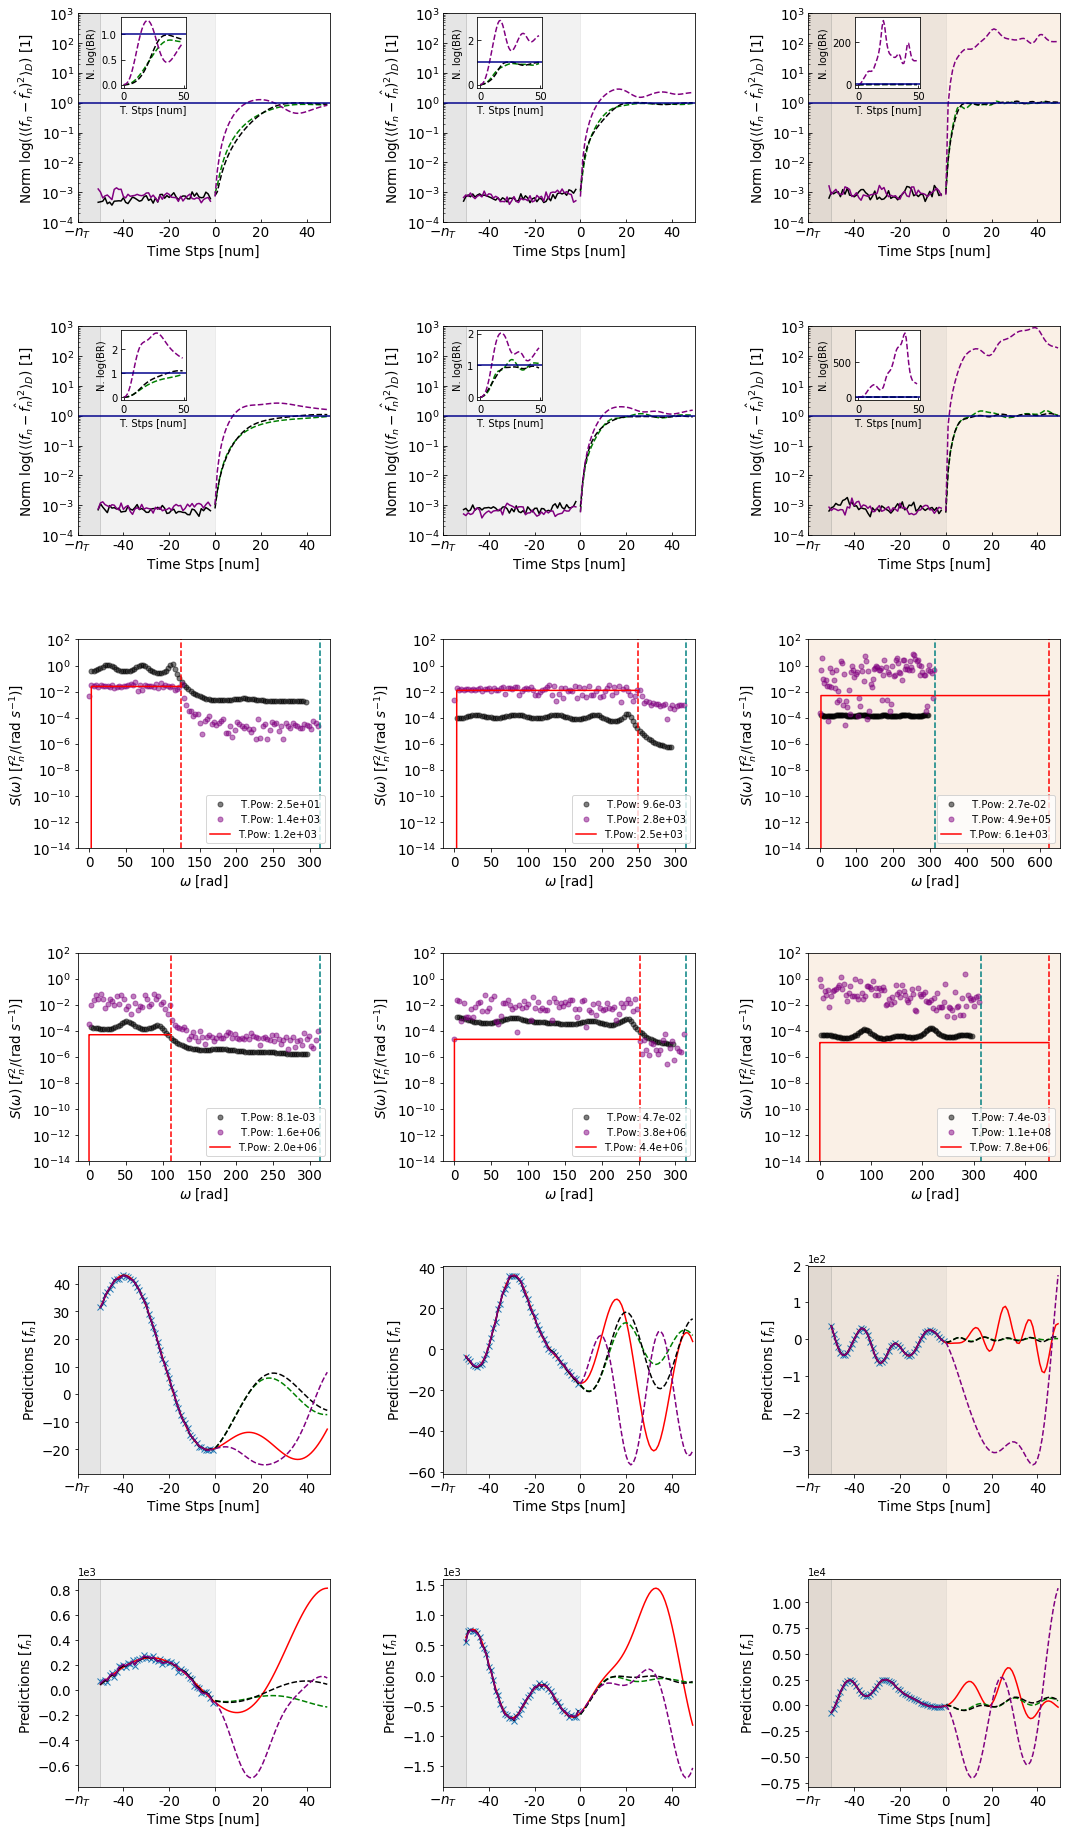

In [11]:
nrows = 6
ncols = 3

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.08, right=0.99, 
                       top=0.95, bottom=0.07, 
                       wspace=0.45, hspace=0.5)

test_case_list = [ 24, 24, 24, 21, 21, 22]
variation_list = [2, 4, 7, 1, 5, 3]
path = './PaperFigsData/'
trans_c = [0.12, 0.45, 0.8]
trans_r = [0.913, 0.758, 0.0, 0.0, 0.0, 0.0]

fig = plt.figure(figsize=(15,28))

for idx_c in xrange(ncols):


        # Plot normed means
        count = 0
        for idx_r in [0, 1]:
            
            rect = [trans_c[idx_c], trans_r[idx_r], 0.06, 0.035]
            
            ill_spec='w'
            if idx_c ==2:
                ill_spec = 'linen'
            
            vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r, idx_c], facecolor=ill_spec)
            vars()['inset_r_'+str(idx_r)+'_c_'+str(idx_c)] = plt.axes(rect, facecolor='w')

            ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
            
            inset = vars()['inset_r_'+str(idx_r)+'_c_'+str(idx_c)]

            ax, inset = pnm(ax, inset,  ALGOKEYS[0:4], 
                            test_case_list[idx_c  + count], variation_list[idx_c  + count], path, GPRP_load='No',
                            fstep=50, sstep=50, lowloss=20, 
                            ylim = [-4, 3], yscale='log')
            count +=3
        
        # Plot single predictions
        count = 0
        for idx_r in [4, 5]:
            
            ill_spec='w'
            if idx_c ==2:
                ill_spec = 'linen'
                
            vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r, idx_c], facecolor=ill_spec)
            vars()['ax_r_'+str(idx_r-2)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r-2, idx_c], facecolor=ill_spec)
            
            ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
            ax2 = vars()['ax_r_'+str(idx_r-2)+'_c_'+str(idx_c)]
           
            ax, ax2 = psp(ax, ax2, ALGOKEYS[0:4], 
                     test_case_list[idx_c  + count], variation_list[idx_c  + count], path, GPRP_load='No',
                     fstep=50, sstep=50, lowloss=20, 
                    ylim_amps = [-14, 2], yscale='linear')
            count +=3

            
for idx_r in xrange(nrows):
    for idx_c in xrange(ncols):
        ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)

fig.savefig(path+'fig_3_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

#create new SVG figure
fig3 = sg.SVGFigure("1100px", "1310px")
subfig1 = sg.fromfile(path+'fig_pred_lgd_lng_ill_v_0.svg')
subfig2 = sg.fromfile(path+'fig_3_v_'+str(ver)+'.svg')

# get the plot objects
plot1 = subfig1.getroot()
plot2 = subfig2.getroot()

plot2.moveto(0, 5, scale=1.0) #no scaling, displace plot2 vertically

# add text labels
txt1 = sg.TextElement(70, 93, "(i)", size=18, font='Arial', weight="bold")
txt2 = sg.TextElement(450, 93, "(ii)", size=18, font='Arial', weight="bold")
txt3 = sg.TextElement(815, 93, "(iii)", size=18, font='Arial', weight="bold")

num1 = sg.TextElement(30, 93, "B", size=18, font='Arial', weight="bold")
num2 = sg.TextElement(30, 400, "C", size=18, font='Arial', weight="bold")
num3 = sg.TextElement(30, 710, "B", size=18, font='Arial', weight="bold")
num4 = sg.TextElement(30, 1010, "C", size=18, font='Arial', weight="bold")

# append plots and labels to figure
fig3.append([plot2, plot1])
fig3.append([txt1, txt2, txt3, num1, num2, num3, num4])

# assign filenames to SVG files
filename ="compiled_fig_3_ver_"+str(ver)
filenamesvg = './Notes_2017_v4/img/'+filename+".svg"
filenamepdf = './Notes_2017_v4/img/'+filename+'.pdf'

fig3.save(filenamesvg)

!inkscape --file=$filenamesvg  --export-pdf=$filenamepdf --export-latex

### Fig 4A

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 27, 1)
(27, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
('I am in RISK DICT and test case and variations are:', 27, 1)
('Total coeff', 2192.108213750957, 0.88373566921360558)
LKFFB
('I am in RISK DICT and test case and variations are:', 27, 1)
GPRP
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 27, 5)
(27, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
('I am in RISK DICT and test case and variations are:', 27, 5)
('Total coeff', 8.8893426185236102, 0.0035836867443727756)
LKFFB
('I am in RISK DICT and test case and variations are:', 27, 5)
GPRP
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 27, 8)
(27, 8)
LSF: Data Loaded? Yes
AKF: Data Loaded? Ye

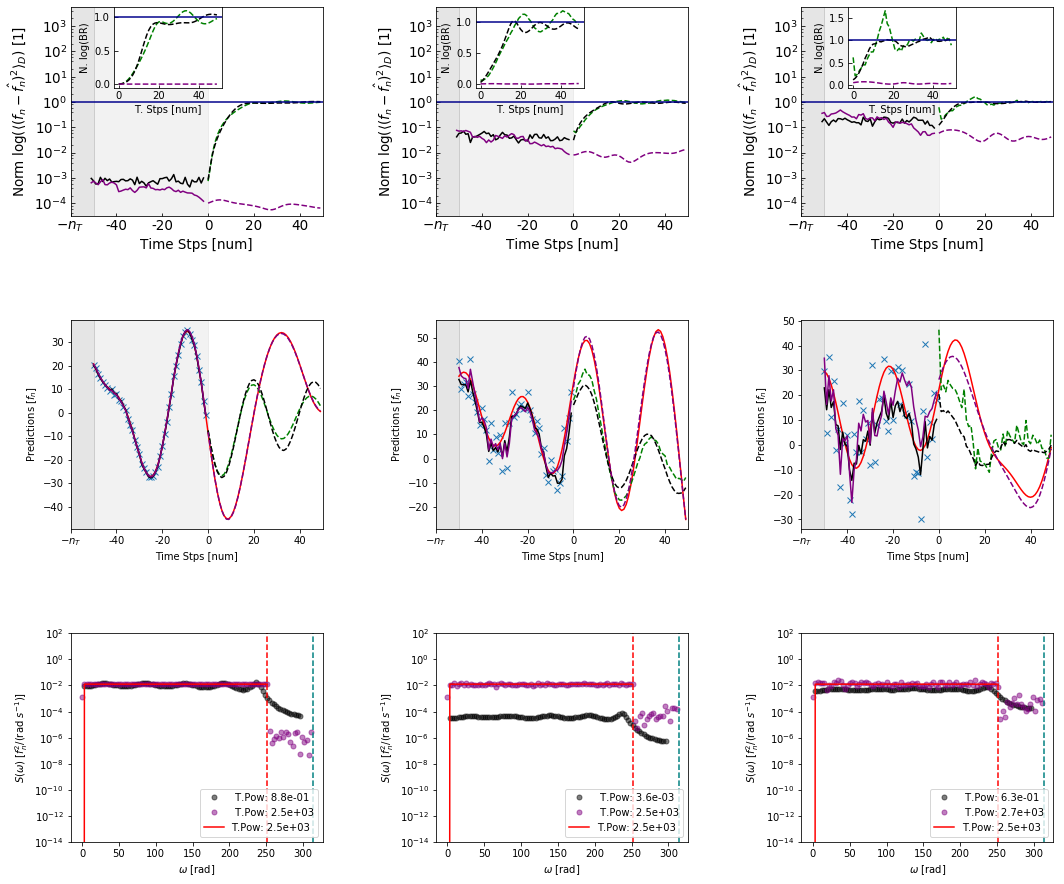

In [12]:
nrows = 6
ncols = 3
idx_cases=0

test_case_list = [27, 27, 27, 27, 27, 27]
variation_list = [1, 5, 8, 1, 5, 8]
path = './PaperFigsData/'
trans_c = [0.12, 0.455, 0.8]
trans_r = [0.91, 0.0, 0.0, 0.443, 0.0, 0.0]

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.08, right=0.99, 
                       top=0.95, bottom=0.07, 
                       wspace=0.45, hspace=0.5)


fig = plt.figure(figsize=(15,28))

for idx_c in xrange(ncols):


        # Plot normed means
        count = 0
        for idx_r in [0]:#, 3]:
            
            YLIM=-4.5
            H_INSET = 0.1                
            rect = [trans_c[idx_c], trans_r[idx_r], H_INSET, 0.04]
            
            vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r, idx_c])
            vars()['inset_r_'+str(idx_r)+'_c_'+str(idx_c)] = plt.axes(rect, facecolor='w')

            ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
            
            inset = vars()['inset_r_'+str(idx_r)+'_c_'+str(idx_c)]

            ax, inset = pnm(ax, inset,  ALGOKEYS[0:4], 
                            test_case_list[idx_c  + count], variation_list[idx_c  + count], path, GPRP_load='No',
                            fstep=50, sstep=50, lowloss=20, 
                            ylim = [YLIM, 3.75], yscale='log')
            count +=3
        
        # Plot single predictions
        count = 0
        for idx_r in [1]:#, 4]:
            
            vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r, idx_c])
            vars()['ax_r_'+str(idx_r+1)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r+1, idx_c])
            
            ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
            ax2 = vars()['ax_r_'+str(idx_r+1)+'_c_'+str(idx_c)]
           
            ax, ax2 = psp(ax, ax2, ALGOKEYS[0:4], 
                     test_case_list[idx_c  + count], variation_list[idx_c  + count], path, GPRP_load='No',
                     fstep=50, sstep=50, lowloss=20, 
                     ylim_amps = [-14, 2], yscale='linear')
            count +=3

            
for idx_r in xrange(1):
    for idx_c in xrange(ncols):
        ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)
            
fig.savefig(path+'fig_4A_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

#create new SVG figure
fig4A = sg.SVGFigure("1100", "700px")
subfig1 = sg.fromfile(path+'fig_pred_lgd_lng_v_0.svg')
subfig2 = sg.fromfile(path+'fig_4A_v_'+str(ver)+'.svg')

# get the plot objects
plot1 = subfig1.getroot()
plot2 = subfig2.getroot()

plot2.moveto(0, 5, scale=1.0) #no scaling, displace plot2 vertically

# add text labels
txt1 = sg.TextElement(75, 93, "(i)", size=18, font='Arial', weight="bold")
txt2 = sg.TextElement(450, 93, "(ii)", size=18, font='Arial', weight="bold")
txt3 = sg.TextElement(815, 93, "(iii)", size=18, font='Arial', weight="bold")

num1 = sg.TextElement(30, 93, "A", size=18, font='Arial', weight="bold")
num2 = sg.TextElement(30, 400, "A", size=18, font='Arial', weight="bold")

# append plots and labels to figure
fig4A.append([plot2, plot1])
fig4A.append([txt1, txt2, txt3, num1, num2])

# assign filenames to SVG files
filename ="compiled_fig_4A_ver_"+str(ver)
filenamesvg = './Notes_2017_v4/img/'+filename+".svg"
filenamepdf = './Notes_2017_v4/img/'+filename+'.pdf'

fig4A.save(filenamesvg)

!inkscape --file=$filenamesvg --export-pdf=$filenamepdf --export-latex

### FIG 4B

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 19, 1)
(19, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
('I am in RISK DICT and test case and variations are:', 19, 1)
('Total coeff', 66022.391337575231, 0.014971805346470963)
LKFFB
('I am in RISK DICT and test case and variations are:', 19, 1)
GPRP
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 19, 5)
(19, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
('I am in RISK DICT and test case and variations are:', 19, 5)
('Total coeff', 651.77941791928072, 0.00014780310704029108)
LKFFB
('I am in RISK DICT and test case and variations are:', 19, 5)
GPRP
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 19, 8)
(19, 8)
LSF: Data Loaded? Yes
AKF: Data Loaded?

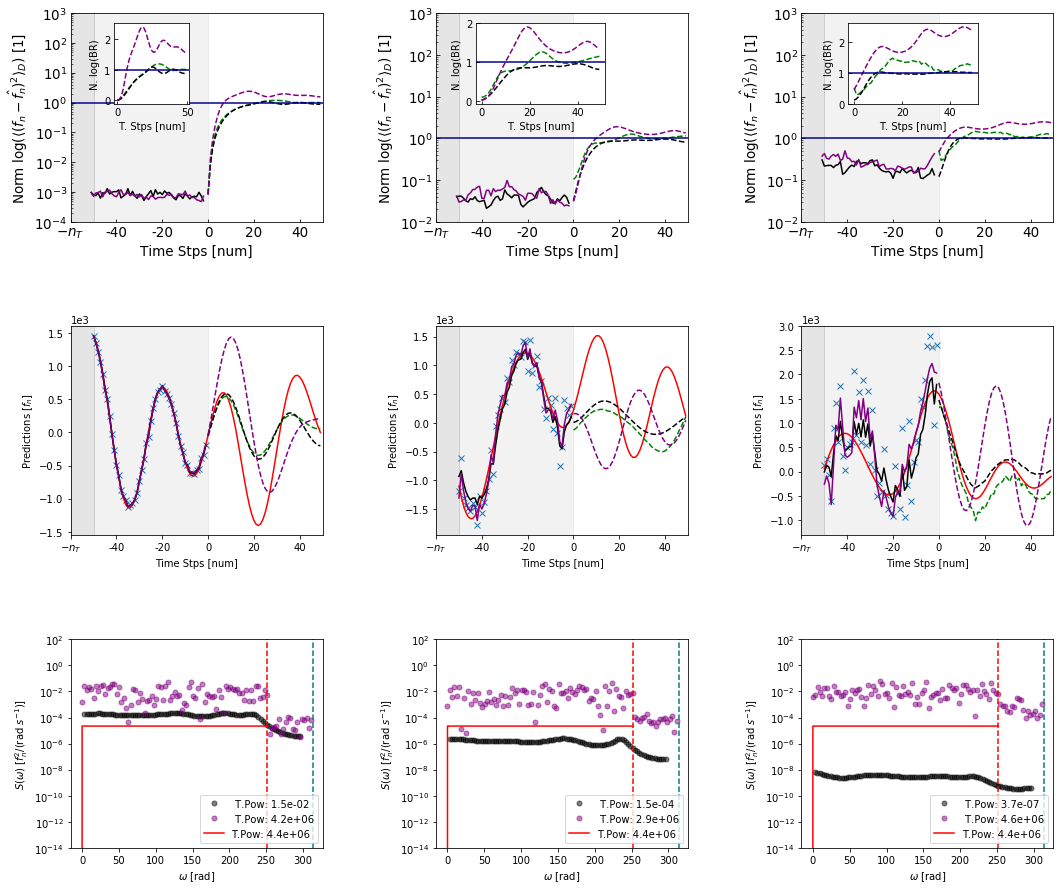

In [13]:
nrows = 6
ncols = 3
idx_cases=0

test_case_list = [19, 19, 19, 27, 27, 27]
variation_list = [1, 5, 8, 1, 5, 8]
path = './PaperFigsData/'
trans_c = [0.12, 0.455, 0.8]
trans_r = [0.905, 0.0, 0.0, 0.443, 0.0, 0.0]

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.08, right=0.99, 
                       top=0.95, bottom=0.07, 
                       wspace=0.45, hspace=0.5)


fig = plt.figure(figsize=(15,28))

for idx_c in xrange(ncols):


        # Plot normed means
        count = 0
        for idx_r in [0]:#, 3]:
            
            YLIM=-4
            H_INSET = 0.07
            if idx_c !=0:
                YLIM = -2
                H_INSET = 0.12
                
            rect = [trans_c[idx_c], trans_r[idx_r], H_INSET, 0.04]
            
            vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r, idx_c])
            vars()['inset_r_'+str(idx_r)+'_c_'+str(idx_c)] = plt.axes(rect, facecolor='w')

            ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
            
            inset = vars()['inset_r_'+str(idx_r)+'_c_'+str(idx_c)]

            ax, inset = pnm(ax, inset,  ALGOKEYS[0:4], 
                            test_case_list[idx_c  + count], variation_list[idx_c  + count], path, GPRP_load='No',
                            fstep=50, sstep=50, lowloss=20, 
                            ylim = [YLIM, 3], yscale='log')
            count +=3
        
        # Plot single predictions
        count = 0
        for idx_r in [1]:#, 4]:
            
            vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r, idx_c])
            vars()['ax_r_'+str(idx_r+1)+'_c_'+str(idx_c)] = fig.add_subplot(gs[idx_r+1, idx_c])
            
            ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
            ax2 = vars()['ax_r_'+str(idx_r+1)+'_c_'+str(idx_c)]
           
            ax, ax2 = psp(ax, ax2, ALGOKEYS[0:4], 
                     test_case_list[idx_c  + count], variation_list[idx_c  + count], path, GPRP_load='No',
                     fstep=50, sstep=50, lowloss=20, 
                    ylim_amps = [-14, 2], yscale='linear')
            count +=3

            
for idx_r in xrange(1):
    for idx_c in xrange(ncols):
        ax = vars()['ax_r_'+str(idx_r)+'_c_'+str(idx_c)]
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)
            
fig.savefig(path+'fig_4_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

#create new SVG figure
fig4 = sg.SVGFigure("1100", "1010px")
subfig1 = sg.fromfile(path+'fig_pred_lgd_lng_v_0.svg')
subfig2 = sg.fromfile(path+'fig_4_v_'+str(ver)+'.svg')

# get the plot objects

plot1 = subfig1.getroot()
plot2 = subfig2.getroot()

plot2.moveto(0, 5, scale=1.0) #no scaling, displace plot2 vertically

# add text labels
txt1 = sg.TextElement(75, 93, "(i)", size=18, font='Arial', weight="bold")
txt2 = sg.TextElement(450, 93, "(ii)", size=18, font='Arial', weight="bold")
txt3 = sg.TextElement(815, 93, "(iii)", size=18, font='Arial', weight="bold")

num1 = sg.TextElement(30, 93, "C", size=18, font='Arial', weight="bold")
num2 = sg.TextElement(30, 400, "C", size=18, font='Arial', weight="bold")
num3 = sg.TextElement(30, 710, "C", size=18, font='Arial', weight="bold")

# append plots and labels to figure
fig4.append([plot2, plot1])
fig4.append([txt1, txt2, txt3, num1, num2, num3])

# assign filenames to SVG files
filename ="compiled_fig_4_ver_"+str(ver)
filenamesvg = './Notes_2017_v4/img/'+filename+".svg"
filenamepdf = './Notes_2017_v4/img/'+filename+'.pdf'

fig4.save(filenamesvg)

!inkscape --file=$filenamesvg --export-area-drawing --export-pdf=$filenamepdf --export-latex

In [36]:
#create new SVG figure
fig5 = sg.SVGFigure("1100", "1675")
subfig1 = sg.fromfile(path+'fig_4A_v_'+str(ver)+'.svg')
subfig2 = sg.fromfile(path+'fig_4_v_'+str(ver)+'.svg')
subfig0 = sg.fromfile(path+'fig_pred_lgd_lng_v_0.svg')

# get the plot objects
plot0 = subfig0.getroot()
plot1 = subfig1.getroot()
plot2 = subfig2.getroot()

plot2.moveto(0, 675, scale=1.0) #no scaling, displace plot2 vertically

# append plots and labels to figure
fig5.append([plot1, plot2, plot0])

txt1 = sg.TextElement(75, 93, "(i) 1% NL", size=18, font='Arial', weight="bold")
txt2 = sg.TextElement(450, 93, "(ii) 10% NL", size=18, font='Arial', weight="bold")
txt3 = sg.TextElement(815, 93, "(iii) 25% NL", size=18, font='Arial', weight="bold")

num1 = sg.TextElement(30, 93, "A", size=18, font='Arial', weight="bold")
num2 = sg.TextElement(30, 425, "A", size=18, font='Arial', weight="bold")
num3 = sg.TextElement(30, 767, "C", size=18, font='Arial', weight="bold")
num4 = sg.TextElement(30, 1075, "C", size=18, font='Arial', weight="bold")
num5 = sg.TextElement(30, 1385, "C", size=18, font='Arial', weight="bold")

fig5.append([txt1, txt2, txt3, num1, num2, num3, num4, num5])
# assign filenames to SVG files
filename ="compiled_fig_4Com_ver_"+str(ver)
filenamesvg = './Notes_2017_v4/img/'+filename+".svg"
filenamepdf = './Notes_2017_v4/img/'+filename+'.pdf'

fig5.save(filenamesvg)

!inkscape --file=$filenamesvg --export-pdf=$filenamepdf --export-latex

### FIG 5

('gridspec coordinates', 0, 0)
('test case, variation', 22, 2)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 22, 2)
('gridspec coordinates', 0, 1)
('test case, variation', 22, 3)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 22, 3)
('gridspec coordinates', 1, 0)
('test case, variation', 19, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 19, 1)
('gridspec coordinates', 1, 1)
('test case, variation', 19, 8)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 19, 8)


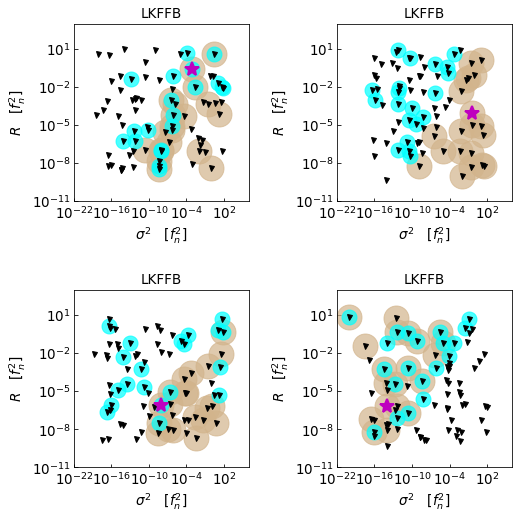

In [26]:
nrows = 2
ncols = 2

test_case_list = [22, 19]
variation_list = [2, 3, 1, 8]

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.12, right=0.99, 
                       top=0.95, bottom=0.07, 
                       wspace=0.5, hspace=0.5)

fig = plt.figure(figsize=(7,7))

count=0
for idx_rows in xrange(nrows):

    for idx_cols in xrange(ncols):
        
        print('gridspec coordinates', idx_rows, idx_cols)
        print('test case, variation', test_case_list[idx_rows], variation_list[idx_cols + count])

        # Data 
        idx_case = 0
        testobj = le(test_case_list[idx_rows], variation_list[idx_cols + count], 
                     AKF_path=path,
                     LKFFB_path=path,
                     LSF_path=path, 
                     GPRP_path=path, GPRP_load='No')
        RISKDICT = build_risk_dict(testobj)
        algotype = 'LKFFB'

        # Row 1 
        ax = fig.add_subplot(gs[idx_rows, idx_cols])
        ax = plot_risk_map(ax, algotype, RISKDICT, fstep=50, sstep=50, lowloss=20, 
                      xlim=[-22, 6], ylim = [-11, 3])
        
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)

    count +=2
    
plt.show()
plt.close()

### FIG 6

('gridspec coordinates', 0, 0)
('test case, variation', 22, 2)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 22, 2)
('gridspec coordinates', 0, 1)
('test case, variation', 22, 3)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 22, 3)
('gridspec coordinates', 1, 0)
('test case, variation', 19, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 19, 1)
('gridspec coordinates', 1, 1)
('test case, variation', 19, 8)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 19, 8)


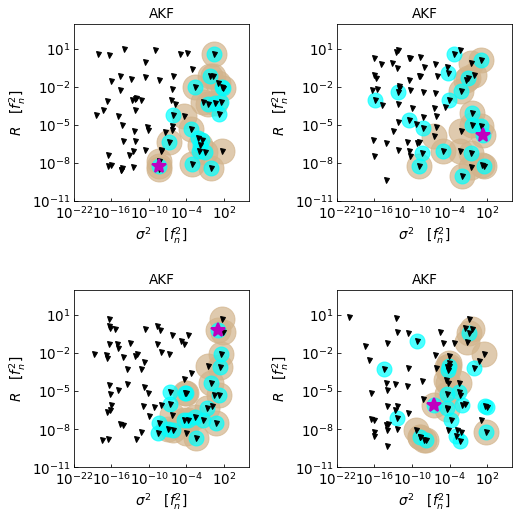

In [16]:
nrows = 2
ncols = 2

test_case_list = [22, 19]
variation_list = [2, 3, 1, 8]

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.12, right=0.99, 
                       top=0.95, bottom=0.07, 
                       wspace=0.5, hspace=0.5)

fig = plt.figure(figsize=(7,7))

count=0
for idx_rows in xrange(nrows):

    for idx_cols in xrange(ncols):
        
        print('gridspec coordinates', idx_rows, idx_cols)
        print('test case, variation', test_case_list[idx_rows], variation_list[idx_cols + count])

        # Data 
        idx_case = 0
        testobj = le(test_case_list[idx_rows], variation_list[idx_cols + count], 
                     AKF_path=path,
                     LKFFB_path=path,
                     LSF_path=path, 
                     GPRP_path=path, GPRP_load='No')
        RISKDICT = build_risk_dict(testobj)
        algotype = 'AKF'

        # Row 1 
        ax = fig.add_subplot(gs[idx_rows, idx_cols])
        ax = plot_risk_map(ax, algotype, RISKDICT, fstep=50, sstep=50, lowloss=20, 
                      xlim=[-22, 6], ylim = [-11, 3])
        
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)
    
    count +=2
    
plt.show()
plt.close()

### FIG 8

('gridspec coordinates', 0, 0)
('test case, variation', 21, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 21, 1)
('gridspec coordinates', 0, 1)
('test case, variation', 22, 3)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 22, 3)
('gridspec coordinates', 1, 0)
('test case, variation', 21, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 21, 1)
('gridspec coordinates', 1, 1)
('test case, variation', 22, 3)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 22, 3)


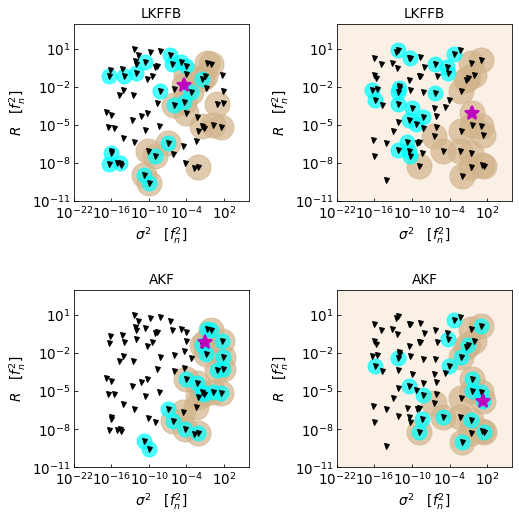

In [17]:
nrows = 2
ncols = 2

test_case_list = [21, 22]
variation_list = [1, 3]

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.12, right=0.99, 
                       top=0.95, bottom=0.07, 
                       wspace=0.5, hspace=0.5)

fig = plt.figure(figsize=(7,7))


for idx_rows in xrange(nrows):
    
    algotype = ALGOLIST[idx_rows]
    
    for idx_cols in xrange(ncols):
        
        print('gridspec coordinates', idx_rows, idx_cols)
        print('test case, variation', test_case_list[idx_cols], variation_list[idx_cols])

        # Data 
        idx_case = 0
        testobj = le(test_case_list[idx_cols], variation_list[idx_cols], 
                     AKF_path=path,
                     LKFFB_path=path,
                     LSF_path=path, 
                     GPRP_path=path, GPRP_load='No')
        RISKDICT = build_risk_dict(testobj)
        

        # Row 1
        ill_spec= 'w'
        if idx_cols == 1:
            ill_spec = 'linen'
        ax = fig.add_subplot(gs[idx_rows, idx_cols], facecolor=ill_spec)
        ax = plot_risk_map(ax, algotype, RISKDICT, fstep=50, sstep=50, lowloss=20, 
                      xlim=[-22, 6], ylim = [-11, 3])
        
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)

fig.savefig(path+'fig_8_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

#create new SVG figure
fig8 = sg.SVGFigure("525px", "620px")
subfig1 = sg.fromfile(path+'fig_risk_lgd_ill_v_0.svg')
subfig2 = sg.fromfile(path+'fig_8_v_'+str(ver)+'.svg')

# get the plot objects
plot1 = subfig1.getroot()
plot2 = subfig2.getroot()

plot2.moveto(5, 108, scale=1.0) #no scaling, displace plot2 vertically

# add text labels
txt1 = sg.TextElement(70, 108, "C(i)", size=18, font='Arial', weight="bold")
txt2 = sg.TextElement(330, 108, "C(iii)", size=18, font='Arial', weight="bold")

#num1 = sg.TextElement(30, 108, "(i)", size=18, font='Arial', weight="bold")
#num2 = sg.TextElement(30, 380, "(ii)", size=18, font='Arial', weight="bold")

# append plots and labels to figure
fig8.append([plot1, plot2])
fig8.append([txt1, txt2]),# num1, num2])

# assign filenames to SVG files
filename ="compiled_fig_8_ver_"+str(ver)
filenamesvg = './Notes_2017_v4/img/'+filename+".svg"
filenamepdf = './Notes_2017_v4/img/'+filename+'.pdf'

fig8.save(filenamesvg)

!inkscape --file=$filenamesvg --export-area-drawing --export-pdf=$filenamepdf --export-latex


### FIG 10

('gridspec coordinates', 0, 0)
('test case, variation', 27, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 27, 5)
('gridspec coordinates', 0, 1)
('test case, variation', 27, 8)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 27, 8)
('gridspec coordinates', 1, 0)
('test case, variation', 27, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 27, 5)
('gridspec coordinates', 1, 1)
('test case, variation', 27, 8)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
('I am in RISK DICT and test case and variations are:', 27, 8)


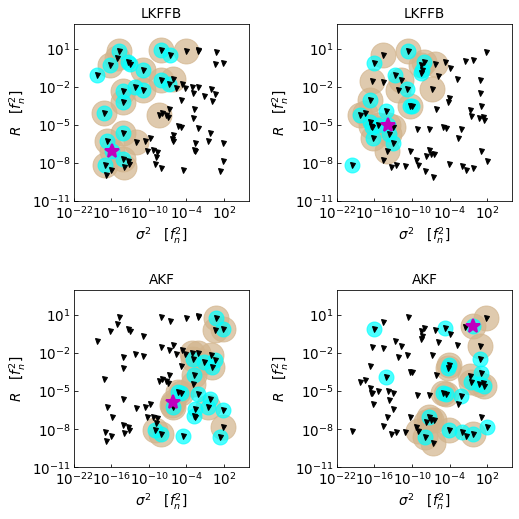

In [33]:
nrows = 2
ncols = 2

test_case_list = [27, 27]
variation_list = [5, 8]

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.12, right=0.99, 
                       top=0.95, bottom=0.07, 
                       wspace=0.5, hspace=0.5)

fig = plt.figure(figsize=(7,7))


for idx_rows in xrange(nrows):
    
    algotype = ALGOLIST[idx_rows]
    
    for idx_cols in xrange(ncols):
        
        print('gridspec coordinates', idx_rows, idx_cols)
        print('test case, variation', test_case_list[idx_cols], variation_list[idx_cols])

        # Data 
        idx_case = 0
        testobj = le(test_case_list[idx_cols], variation_list[idx_cols], 
                     AKF_path=path,
                     LKFFB_path=path,
                     LSF_path=path, 
                     GPRP_path=path, GPRP_load='No')
        RISKDICT = build_risk_dict(testobj)
        

        # Row 1

        ax = fig.add_subplot(gs[idx_rows, idx_cols], facecolor='w')
        ax = plot_risk_map(ax, algotype, RISKDICT, fstep=50, sstep=50, lowloss=20, 
                      xlim=[-22, 6], ylim = [-11, 3])
        
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fsize)

fig.savefig(path+'fig_10_v_'+str(ver)+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

#create new SVG figure
fig10 = sg.SVGFigure("525px", "620px")
subfig1 = sg.fromfile(path+'fig_risk_lgd_v_0.svg')
subfig2 = sg.fromfile(path+'fig_10_v_'+str(ver)+'.svg')

# get the plot objects
plot1 = subfig1.getroot()
plot2 = subfig2.getroot()

plot2.moveto(5, 108, scale=1.0) #no scaling, displace plot2 vertically

# add text labels
txt1 = sg.TextElement(70, 108, "A(10%NL)", size=18, font='Arial', weight="bold")
txt2 = sg.TextElement(330, 108, "A(25%NL)", size=18, font='Arial', weight="bold")

#num1 = sg.TextElement(30, 108, "(i)", size=18, font='Arial', weight="bold")
#num2 = sg.TextElement(30, 380, "(ii)", size=18, font='Arial', weight="bold")

# append plots and labels to figure
fig10.append([plot1, plot2])
fig10.append([txt1, txt2]),# num1, num2])

# assign filenames to SVG files
filename ="compiled_fig_10_ver_"+str(ver)
filenamesvg = './Notes_2017_v4/img/'+filename+".svg"
filenamepdf = './Notes_2017_v4/img/'+filename+'.pdf'

fig10.save(filenamesvg)

!inkscape --file=$filenamesvg --export-area-drawing --export-pdf=$filenamepdf --export-latex


# GPR - Tuning Issues

The issue is how to choose the set of optimal hyperam initial conditions since GPy Optimisers are not working. A low loss value could be a random instance and so we don't want to pick the lowest loss values. This is why we report averages for random sets of initial conditions for L-BFGS-B.

Here, we pick from the set of initial conditions for L-BFGS-B which yields a loss value (approximatey the bottom 10), and further, yields a periodicity close to n_train (approximately top 10) of sorted loss / periodicity values respectively. This set is called ideal_instances below. 

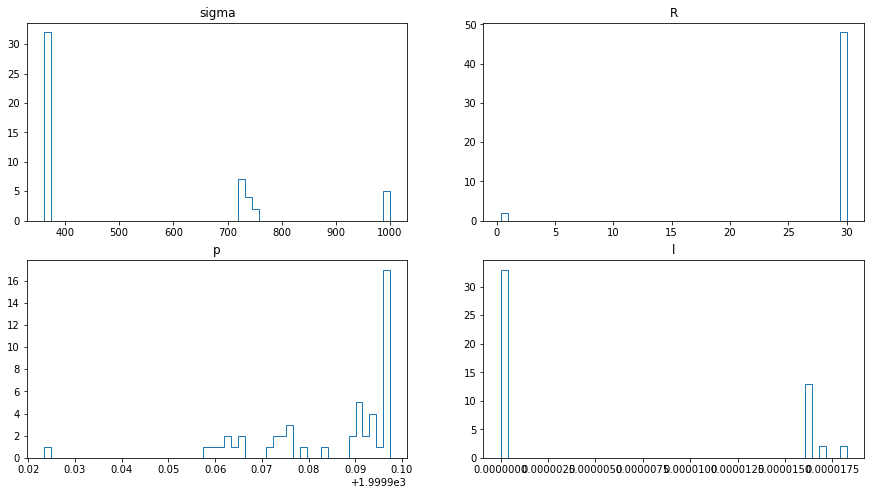

In [18]:
title = ['sigma', 'R', 'p', 'l']
plt.figure(figsize=(15,8))
for i in xrange(4):
    plt.subplot(2,2,i+1)
    plt.hist(testobj.GPRP_GPR_opt_params[:, i], histtype='step', bins=50, normed=False)
    plt.title(title[i])
plt.show()

In [19]:
loss = np.mean(testobj.GPRP_GPR_PER_prediction_errors, axis=1)

from plotting_tools.risk_analysis import sort_my_vals
idxs, vals = sort_my_vals(loss)
plt.figure()
plt.plot(vals)
plt.show()

NameError: name 'np' is not defined

In [ ]:
idxp, periods = sort_my_vals(testobj.GPRP_GPR_opt_params[:, 2])
plt.figure()
plt.plot(periods, 'o')
plt.show()

In [ ]:
increment= 10 # top (bottom) of periodicity (loss) values
trials = 50 # number of runs

ok_losses = set(idxs[0:increment])
ok_periods = set(idxp[trials-increment:])
ideal_instances = list(ok_losses.intersection(ok_periods))


title = ['sigma', 'R', 'p', 'l']
plt.figure(figsize=(15,8))
for idx_ideal in ideal_instances:
    for i in xrange(4):
        plt.subplot(2,2,i+1)
        datum = testobj.GPRP_GPR_opt_params[idx_ideal, i]
        print datum
        plt.hist(datum, histtype='step', bins=20, normed=False)
        plt.title(title[i])
plt.show()

# IGNORE

ax_.set_xlim([10**-11,1000])
    ax_.set_ylim([10**-11,1000])
    ax_.set_xscale('log')
    ax_.set_yscale('log')
    ax_.plot(s_sigma[0:lowloss], s_R[0:lowloss], 'o', c='tan', markersize=25, alpha=0.7)
    ax_.plot(f_sigma[0:lowloss], f_R[0:lowloss], 'o', c='cyan', markersize=15, alpha=0.7)
    ax_.plot(s_sigma, s_R, 'kv', markersize=5, alpha=1.0)
    ax_.plot(s_sigma[0], s_R[0],'*', color='m', markersize=15, mew=2)
    ax_.tick_params(direction='in', which='both')
    
    ax_.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
    ax_.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
    
    for idx_traj in range(len(s_traj)-1, -1, -1):
        if idx_traj < lowloss:
            ax_2.plot(range(-50, 0, 1), s_traj[idx_traj][0:fstep], '-', markersize=4, alpha=0.4, c='tan')
            ax_2.plot(range(0, fstep, 1), f_traj[idx_traj][0:fstep], '-', markersize=4, alpha=0.4, c='c')
        elif idx_traj >= lowloss: 
            ax_2.plot(range(-50, 0, 1), s_traj[idx_traj][0:fstep], '-', markersize=4, alpha=0.1, c='k')
            ax_2.plot(range(0, fstep, 1), f_traj[idx_traj][0:fstep], '-', markersize=4, alpha=0.1, c='k')

    ax_2.plot(range(-50, 0, 1), s_traj[0], '-', markersize=4, c='m')
    ax_2.plot(range(0, fstep, 1), f_traj[0][0:fstep], '-', markersize=4, c='m')
    ax_2.set_yscale('log')
    ax_2.set_ylim([1, 10**7])
    
    ax_2.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=6))

from plotting_tools.risk_analysis import build_risk_dict, analyse_kalman_errs
from plotting_tools.tuned_run_analysis import TUNED_RUNS_DICT

testobj = le(15, 12, 
            AKF_path=path,
            LKFFB_path=path,
            LSF_path=path, 
            GPRP_path=path)

pickone = int(np.random.uniform(low=0, high=49))
truth = testobj.LSF_macro_truths[pickone, :]
signal = testobj.LSF_macro_data[pickone, :]

ntb = testobj.Expt.n_testbefore
ntn = testobj.Expt.n_train
x_axis = range(-ntb, fstep, 1)


fig = plt.figure(figsize=(10,20))
ax_1 = fig.add_subplot(211)
ax_2 = fig.add_subplot(212)

ax_1.plot(x_axis[ : ntb], signal[ntn - ntb : ntn], 'x', label='Data')
ax_1.plot(x_axis, truth[ntn - ntb : ntn + fstep], 'r', label='Truth')


for algoname in ['LSF', 'AKF', 'GPRP', 'LKFFB']:

    if algoname == 'LKFFB' or algoname == 'AKF':

        RISKDICT=build_risk_dict(testobj)
        opt_sigma, opt_R = analyse_kalman_errs(RISKDICT[algoname][0],
                                               RISKDICT[algoname][1],
                                               50)[2:]

        KWGS = {'opt_sigma': opt_sigma[0], 'opt_R': opt_R[0]}


        faxis, amp, norm, pred = TUNED_RUNS_DICT[algoname](testobj, signal, **KWGS)

        ax_1.plot(x_axis, pred[: ntb + fstep], 'o', markersize=3, label=algoname)
        
        if algoname == 'LKFFB': 
            ax_2.plot(faxis[0], amp[0], label=algoname+': LKFFB (%s)' %(norm[0]))
            ax_2.plot(faxis[1], amp[1], label='Truth (%s)' %(norm[1]))
        else:
            truncatedata = int(faxis.shape[0]*300.0/ faxis[-1])
            ax_2.plot(faxis[0: truncatedata], norm[0: truncatedata], label=algoname+': AKF/LSF')
    else:

        pred = TUNED_RUNS_DICT[algoname](testobj, signal)
        
        if algoname == 'LSF':
            ax_1.plot(x_axis[ntb :], pred, 'o', markersize=3, label=algoname)
        else:
            ax_1.plot(x_axis, pred[ 0 : ntb + fstep], 'o', markersize=3, label=algoname)

ax_2.set_yscale('log')   
ax_1.legend(loc=0)    
ax_2.legend(loc=0)
plt.show()